#### Linear Regression and Logistic Regression assigments are stacked, so the deadline for this homework is 10.10.21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

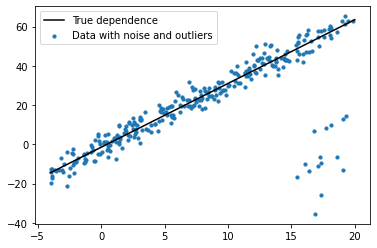

In [ ]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [ ]:
# Initialize the model parameters with zeros
w = np.zeros(dtype=float, shape=X_expanded.shape[1])

loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.1

# Training loop
for _ in trange(1000):
  # Your turn: calculate the gradient of MSE with respect to w:
  gradient = <YOUR CODE>

  # Automatic checks
  assert gradient.shape == w.shape
  assert (
      ((X_expanded @ w - y)**2).mean() > 
      ((X_expanded @ (w - 1.e-6 * gradient) - y)**2).mean()
  )

  # Gradient descent step
  w -= learning_rate * gradient

  # Calculate and record the new loss value
  loss_values.append(
      ((X_expanded @ w - y)**2).mean()
  )

# Plotting the evolution of loss values
plt.plot(loss_values);
plt.show()


# Plotting the solution
x = np.linspace(-1, 1, 101)
x_expanded = np.concatenate([
    poly_expand.transform(x[:,None]),
    np.ones(shape=(len(x), 1))
], axis=1)
plt.plot(x, true_function(x), label='true function')
plt.scatter(X, y);
plt.plot(x,
         x_expanded @ w, label='prediction')
plt.ylim(y.min() - 0.5, y.max() + 0.5)
plt.legend();

In [ ]:
# intialization 
w1=w0=1
search_function = lambda x: w1 * x + w0

y_pred=[]
y_true=[1]
sum = 0 
for i in range (0, len (y_pred)):
  sum = sum+ abs(y_true(i)-y_pred(i))

MAE= sum/len(y_true)


[2.26896431] 1.7049927620104235


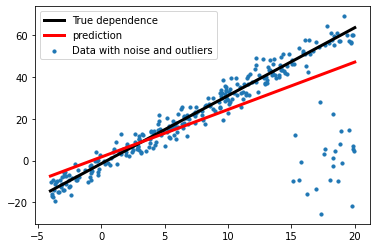

In [ ]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()



# Linear regression skelearn
# linear regression with the MSE loss
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence',linewidth='3')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.plot(x, model.predict(x[:,None]), label='prediction', c='red',linewidth=3)
plt.legend()

print(model.coef_, model.intercept_)

## Task 2 (2 points + 1 bonus point + 1 super-bonus point)

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` to get the accuracy of at least 0.80 (0.82 for the bonus point, 0.85 for the super-bonus point) on the test set.

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features



In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv

--2021-10-24 20:58:24--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-10-24 20:58:24 (4.87 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [ ]:
len(data)

891

In [ ]:
data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
C85            1
B94            1
A5             1
C148           1
C32            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
data['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
CA 2144              6
347088               6
                    ..
234818               1
4579                 1
2667                 1
PC 17612             1
STON/O 2. 3101285    1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[[ "SibSp", "Parch","Sex","Pclass"]].copy()  # we included the sex in the features
                                                                 # we included passengers' class features
  features["Age"] = dataset.Age.fillna(dataset.Age.mean()) # we filled null ages with the mean age
  features["Fare"] = dataset.Age.fillna(dataset.Fare.median()) # we filled null Fares with the median fare
  #features["Fare"] = np.log10(features["Fare"])
  features["Cabin"] = dataset.Cabin.fillna('unknown') # we filled null cabins with the unkonwn value
  features['Embarked'] = data.Embarked.fillna('unknown') #we filled null Fares with the unkown value

  return features

model = make_pipeline(
    # <YOUR CODE>
    # E.g.
    make_column_transformer(
       (OneHotEncoder(sparse=False), ['Embarked']),
      # (OneHotEncoder(sparse=False,handle_unknown = 'ignore'), ['Ticket']),
       (MinMaxScaler(), ['Age']), # Min Max scaling for Age
       (MinMaxScaler(), ['Fare']), # Min Max scaling for fare
       (OneHotEncoder(sparse=False,handle_unknown = 'ignore'), ['Cabin']), # One hot encoding for cabin ,when  unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros.
       (OrdinalEncoder(), ['Pclass']), # ordinal encoding for Pclass
       (OneHotEncoder(sparse=False), ['Sex']), #  one hot encoding for sex
        #remainder='passthrough'
    ),
    LogisticRegression()
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Train accuracy: 0.8306801736613604
Test accuracy: 0.815
